# <font color='#d50283'>S03 T02: Visualització gràfica de Múltiples variables
</font>

##  Visualització gràfica de Múltiples variables.

### Luis Ortas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 


from wordcloud import WordCloud

from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Exercici 1
**Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".**

Realizado en el noteboock:  https://github.com/Luis-Ortas/Visualitzaci-gr-fica-de-M-ltiples-variables/blob/master/Sprint_3_T2.Tips.ipynb

## Exercici 3
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [2]:
df = pd.read_table('movies.dat',sep='::',index_col=0,header=None, engine='python',encoding='latin-1')
df.sample(5)

,1,2
0,,
1853,"Alan Smithee Film: Burn Hollywood Burn, An (1997)",Comedy
3256,Patriot Games (1992),Action|Thriller
444,Even Cowgirls Get the Blues (1993),Comedy|Romance
2862,Caligula (1980),Drama
375,Safe Passage (1994),Drama


In [3]:
#Nombre columnas
df.columns=['Movie','Genre']
df

,Movie,Genre
0,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [4]:
df.shape

(3883, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Movie   3883 non-null   object
 1   Genre   3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [6]:
len(df.Movie.unique())

3883

In [7]:
df_repetidos=df.groupby('Movie').count()
a='No hay repetidos'
for i in df_repetidos.Genre:
        if i > 1:
            print(f'{i} está repetido')
           
            a='Hay Repetidos'        
        
print(a)  

No hay repetidos


**Separamos año**

In [8]:

df[['Movie', 'Year']] = df['Movie'].str.rsplit(pat='(', n=1, expand=True)
df

,Movie,Genre,Year
0,,,
1,Toy Story,Animation|Children's|Comedy,1995)
2,Jumanji,Adventure|Children's|Fantasy,1995)
3,Grumpier Old Men,Comedy|Romance,1995)
4,Waiting to Exhale,Comedy|Drama,1995)
5,Father of the Bride Part II,Comedy,1995)
...,...,...,...
3948,Meet the Parents,Comedy,2000)
3949,Requiem for a Dream,Drama,2000)
3950,Tigerland,Drama,2000)


In [9]:
#Quitamos )
df.Year = df.Year.str[:-1].astype(int)
df.sort_values(by='Year',ascending=True)


,Movie,Genre,Year
0,,,
3132,Daddy Long Legs,Comedy,1919
2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,1919
2821,Male and Female,Adventure|Drama,1919
3309,"Dog's Life, A",Comedy,1920
3231,"Saphead, The",Comedy,1920
...,...,...,...
3827,Space Cowboys,Action|Sci-Fi,2000
3535,American Psycho,Comedy|Horror|Thriller,2000
3829,Mad About Mambo,Comedy|Romance,2000


In [10]:
df

,Movie,Genre,Year
0,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000


### Creamos diferentes Dataframes para poder trabajar con ellos:
* **Movies_year** Df que agrupa por años los diferentes generos y el número de peliculas. 
* **movies_decade:** Df que agrupa por decadas los diferentes generos y el número de peliculas. 
* **genres_sum:** Df suma el total de generos durante todos los años
* **genres_sum_45:** Df suma del total de generos desde 1910 hasta 1945
* **genres_sum_76:** Df suma del total de generos desde 1946 hasta 1976
* **genres_sum_00:Df** suma del total de generos desde 1976 hasta 2000





In [11]:
# Generem un dataframe amb columnes per cada gènere en format OneHotEncoding 
# i les afegim al DataFrame original
genres = df.Genre.str.get_dummies(sep='|').add_prefix('Genre_')
movies = pd.concat([df,genres], axis=1)

movies.Genre=movies.Genre.str.split('|').tolist()

movies.sample(5)

,Movie,Genre,Year,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,,,,,,,,,,,,,,,,,,,,,
1855,Krippendorf's Tribe,[Comedy],1998,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3702,Mad Max,"[Action, Sci-Fi]",1979,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84,Last Summer in the Hamptons,"[Comedy, Drama]",1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
828,"Adventures of Pinocchio, The","[Adventure, Children's]",1996,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3142,U2: Rattle and Hum,"[Documentary, Musical]",1988,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [12]:
# Funció per calcular la dècada (str) a la que pertany un any (int)
def calc_decade(year):
  ''' 
 Función para calcular la decada a partir del añao
  1923 --> 1920s
  2003 --> 2000s

  Paràmetres:
    year:int
  Retorna:
    decade:str
  '''
  return str(year-(year%10))+'s'

# Testejem la funció amb alguns valors
calc_decade(1923), calc_decade(1956), calc_decade(2000)

('1920s', '1950s', '2000s')

In [13]:
# creamos un tipo categorico para ordenar las decadas
decade_dtype = pd.api.types.CategoricalDtype(
    categories=[str(x)+'s' for x in range(1900,2030,10)], ordered=True)

decade_dtype


CategoricalDtype(categories=['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
                  '1960s', '1970s', '1980s', '1990s', '2000s', '2010s',
                  '2020s'],
, ordered=True)

In [14]:
# DataFrame: movies

# Afegim la variable categòrica 'Decade' i reordenem les columnes
#añadimos Decade y ordenamos


movies['Decade'] = movies['Year'].apply(calc_decade)
movies['Decade'] = movies['Decade'].astype(decade_dtype)
movies=movies[['Movie', 'Genre', 'Year', 'Decade','Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Children\'s', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir',
       'Genre_Horror', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Sci-Fi', 'Genre_Thriller', 'Genre_War', 'Genre_Western']]      

movies.sample(10)

,Movie,Genre,Year,Decade,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,,,,,,,,,,,,,,,,,,,,,
2878,Hell Night,[Horror],1981,1980s,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
65,Bio-Dome,[Comedy],1996,1990s,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1446,Kolya,[Comedy],1996,1990s,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2657,"Rocky Horror Picture Show, The","[Comedy, Horror, Musical, Sci-Fi]",1975,1970s,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
1347,"Nightmare on Elm Street, A",[Horror],1984,1980s,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1518,Breakdown,"[Action, Thriller]",1997,1990s,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3319,Judy Berlin,[Drama],1999,1990s,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2638,"Mummy's Tomb, The",[Horror],1942,1940s,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3862,About Adam,[Comedy],2000,2000s,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


* **Movies_year** : Df que agrupa por años los diferentes generos y el número de peliculas

In [15]:
movies1=movies.groupby('Year').agg({'Movie':'count','Decade':'first'})

movies1.sample(10)

,Movie,Decade
Year,,
1972,22,1970s
1966,12,1960s
1928,3,1920s
1994,257,1990s
1973,29,1970s
1941,11,1940s
1965,20,1960s
1927,6,1920s
1956,19,1950s


In [16]:
movies2=movies.groupby('Year').sum()
movies2.sample(10)

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
Year,,,,,,,,,,,,,,,,,,
1977,3,7,2,6,7,0,0,4,1,0,4,1,0,2,3,1,1,0
1934,0,0,0,0,4,0,0,1,0,0,0,1,1,1,0,1,0,0
1937,0,0,1,1,3,1,0,6,0,0,0,5,0,2,0,1,1,0
1978,4,2,2,4,7,1,0,10,1,0,5,1,1,1,5,3,3,1
1961,1,1,1,4,3,0,0,11,2,0,1,3,0,2,1,1,2,1
1974,8,4,0,2,7,1,0,9,0,1,5,0,2,0,0,2,0,2
1940,0,1,3,3,6,0,0,4,0,0,2,2,0,4,1,2,0,3
1965,2,0,0,1,6,0,0,6,0,0,2,3,1,2,1,3,1,2
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0


* Movies_year 

In [17]:
movies_year = movies1.join(movies2)
movies_year.reset_index(inplace=True)
movies_year.sample(10)

,Year,Movie,Decade,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
24,1944,13,1940s,1,0,0,0,2,2,0,...,0,4,4,1,3,0,0,4,2,0
56,1976,21,1970s,4,3,0,1,5,0,0,...,0,0,5,1,0,1,1,4,0,1
61,1981,43,1980s,12,7,3,3,9,3,1,...,2,0,9,1,1,3,4,5,2,0
9,1929,3,1920s,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
52,1972,22,1970s,4,3,0,0,3,3,0,...,0,0,3,1,0,0,2,2,1,3
5,1925,6,1920s,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
10,1930,7,1930s,0,0,0,0,1,1,1,...,0,0,0,1,2,0,0,1,1,0
72,1992,102,1990s,21,3,3,7,37,10,1,...,1,0,12,3,2,14,8,14,3,1
14,1934,7,1930s,0,0,0,0,4,0,0,...,0,0,0,1,1,1,0,1,0,0
28,1948,12,1940s,0,1,1,1,2,2,0,...,0,4,1,1,0,0,0,3,0,0


In [18]:
movies_year.describe()

,Year,Movie,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1959.938272,47.938272,6.209877,3.493827,1.296296,3.098765,14.814815,2.604938,1.567901,19.790123,0.839506,0.543210,4.234568,1.407407,1.308642,5.814815,3.407407,6.074074,1.765432,0.839506
std,23.628556,81.786360,10.818637,5.291794,2.045999,5.083318,27.464573,5.328412,4.407205,37.676822,1.495466,1.000617,4.995677,1.403369,2.432293,12.432931,4.587422,11.851981,2.270857,1.208892
min,1919.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1940.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1960.000000,19.000000,1.000000,2.000000,0.000000,1.000000,3.000000,1.000000,0.000000,6.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000
75%,1980.000000,35.000000,6.000000,4.000000,2.000000,3.000000,10.000000,2.000000,1.000000,12.000000,1.000000,1.000000,7.000000,2.000000,1.000000,4.000000,5.000000,4.000000,2.000000,1.000000
max,2000.000000,345.000000,45.000000,25.000000,8.000000,22.000000,115.000000,26.000000,22.000000,166.000000,6.000000,4.000000,21.000000,7.000000,15.000000,58.000000,18.000000,55.000000,12.000000,6.000000


In [19]:
movies_year.sort_values(by='Movie', ascending=False)

,Year,Movie,Decade,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
76,1996,345,1990s,37,22,7,20,115,23,19,...,5,2,12,7,6,48,14,45,8,1
75,1995,342,1990s,45,25,8,22,89,18,22,...,4,1,16,4,8,50,18,43,12,4
78,1998,337,1990s,44,16,8,18,112,25,18,...,2,3,15,3,10,58,17,51,5,1
77,1997,315,1990s,43,22,6,22,98,26,11,...,6,2,10,5,15,52,18,55,10,0
79,1999,283,1990s,27,7,7,11,103,12,15,...,2,0,14,1,5,37,15,40,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1923,3,1920s,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1919,3,1910s,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1920,2,1920s,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1922,2,1920s,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


* **movies_decade:** Df que agrupa por decadas los diferentes generos y el número de peliculas.

In [20]:
movies_decade=movies_year.groupby('Decade').sum()
movies_decade.drop('Year', axis=1, inplace=True)
movies_decade.reset_index(inplace=True)
movies_decade

,Decade,Movie,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1910s,3,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1920s,34,1,1,0,0,13,1,0,14,0,0,1,1,0,2,1,2,2,0
2,1930s,77,3,6,2,4,23,4,1,26,0,1,7,11,5,15,1,9,5,1
3,1940s,126,2,6,11,13,22,8,0,44,0,17,14,14,9,14,1,17,11,7
4,1950s,168,10,13,5,10,25,7,1,62,4,9,20,17,7,18,32,16,13,7
5,1960s,191,17,16,5,20,41,6,1,69,2,2,26,19,5,10,13,24,13,16
6,1970s,247,41,26,8,25,63,17,2,84,4,1,35,9,6,8,31,22,11,15
7,1980s,598,110,78,14,31,200,21,9,211,24,4,112,12,12,54,66,55,31,3
8,1990s,2283,299,130,52,139,743,139,105,1036,33,10,120,30,61,333,121,322,55,19
9,2000s,156,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0



* **genres_sum:** Df suma el total de generos durante todos los años


In [21]:
movies_year_total=movies_year.drop('Decade',axis=1).copy()
movies_year_total=movies_year_total.groupby('Year').sum()

genres_sum=movies_year_total.sum()

genres_sum.to_frame()
genres_sum = genres_sum.reset_index()

genres_sum=genres_sum.rename(columns={'index':'Genero',0:'Total'})
genres_sum.set_index('Genero',inplace = True)
genres_sum=genres_sum.sort_values(by='Total',ascending=False)
genres_sum.head

<bound method NDFrame.head of                    Total
Genero                  
Movie               3883
Genre_Drama         1603
Genre_Comedy        1200
Genre_Action         503
Genre_Thriller       492
Genre_Romance        471
Genre_Horror         343
Genre_Adventure      283
Genre_Sci-Fi         276
Genre_Children's     251
Genre_Crime          211
Genre_War            143
Genre_Documentary    127
Genre_Musical        114
Genre_Mystery        106
Genre_Animation      105
Genre_Fantasy         68
Genre_Western         68
Genre_Film-Noir       44>

In [22]:
genres_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Movie to Genre_Film-Noir
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


* **genres_sum_45:** Df suma del total de generos desde 1910 hasta 1945


In [23]:
# hasta el 45
movies_year_total_45=movies_year_total.loc[:1945]


genres_sum_45=movies_year_total_45.sum()

genres_sum_45 = genres_sum_45.reset_index()

genres_sum_45=genres_sum_45.rename(columns={'index':'Genero',0:'Total'})
genres_sum_45.set_index('Genero',inplace = True)
genres_sum_45=genres_sum_45.sort_values(by='Total',ascending=False)
genres_sum_45


,Total
Genero,
Movie,191
Genre_Drama,65
Genre_Comedy,55
Genre_Romance,26
Genre_Thriller,22
Genre_Horror,21
Genre_Musical,20
Genre_War,17
Genre_Mystery,12


*EL total de generos es mayor que el total de peliculas ya que es usual que una pelicula tenga varios generos*

* **genres_sum_76:** Df suma del total de generos desde 1946 hasta 1976


In [24]:
# Hasta el 76
movies_year_total_76=movies_year_total.loc[1946:1976]


genres_sum_76=movies_year_total_76.sum()

genres_sum_76 = genres_sum_76.reset_index()

genres_sum_76=genres_sum_76.rename(columns={'index':'Genero',0:'Total'})
genres_sum_76.set_index('Genero',inplace = True)
genres_sum_76=genres_sum_76.sort_values(by='Total',ascending=False)
genres_sum_76


,Total
Genero,
Movie,571
Genre_Drama,210
Genre_Comedy,109
Genre_Horror,70
Genre_Thriller,61
Genre_Sci-Fi,59
Genre_Action,55
Genre_Children's,49
Genre_Musical,48


* **genres_sum_00:Df** suma del total de generos desde 1976 hasta 2000

In [25]:
# Hasta el 2000
movies_year_total_00=movies_year_total.loc[1977:2000]


genres_sum_00=movies_year_total_00.sum()

genres_sum_00 = genres_sum_00.reset_index()

genres_sum_00=genres_sum_00.rename(columns={'index':'Genero',0:'Total'})
genres_sum_00.set_index('Genero',inplace = True)
genres_sum_00=genres_sum_00.sort_values(by='Total',ascending=False)
genres_sum_00

,Total
Genero,
Movie,3121
Genre_Drama,1328
Genre_Comedy,1036
Genre_Action,441
Genre_Thriller,409
Genre_Romance,409
Genre_Horror,252
Genre_Adventure,226
Genre_Sci-Fi,214


***
## Visualizaciones

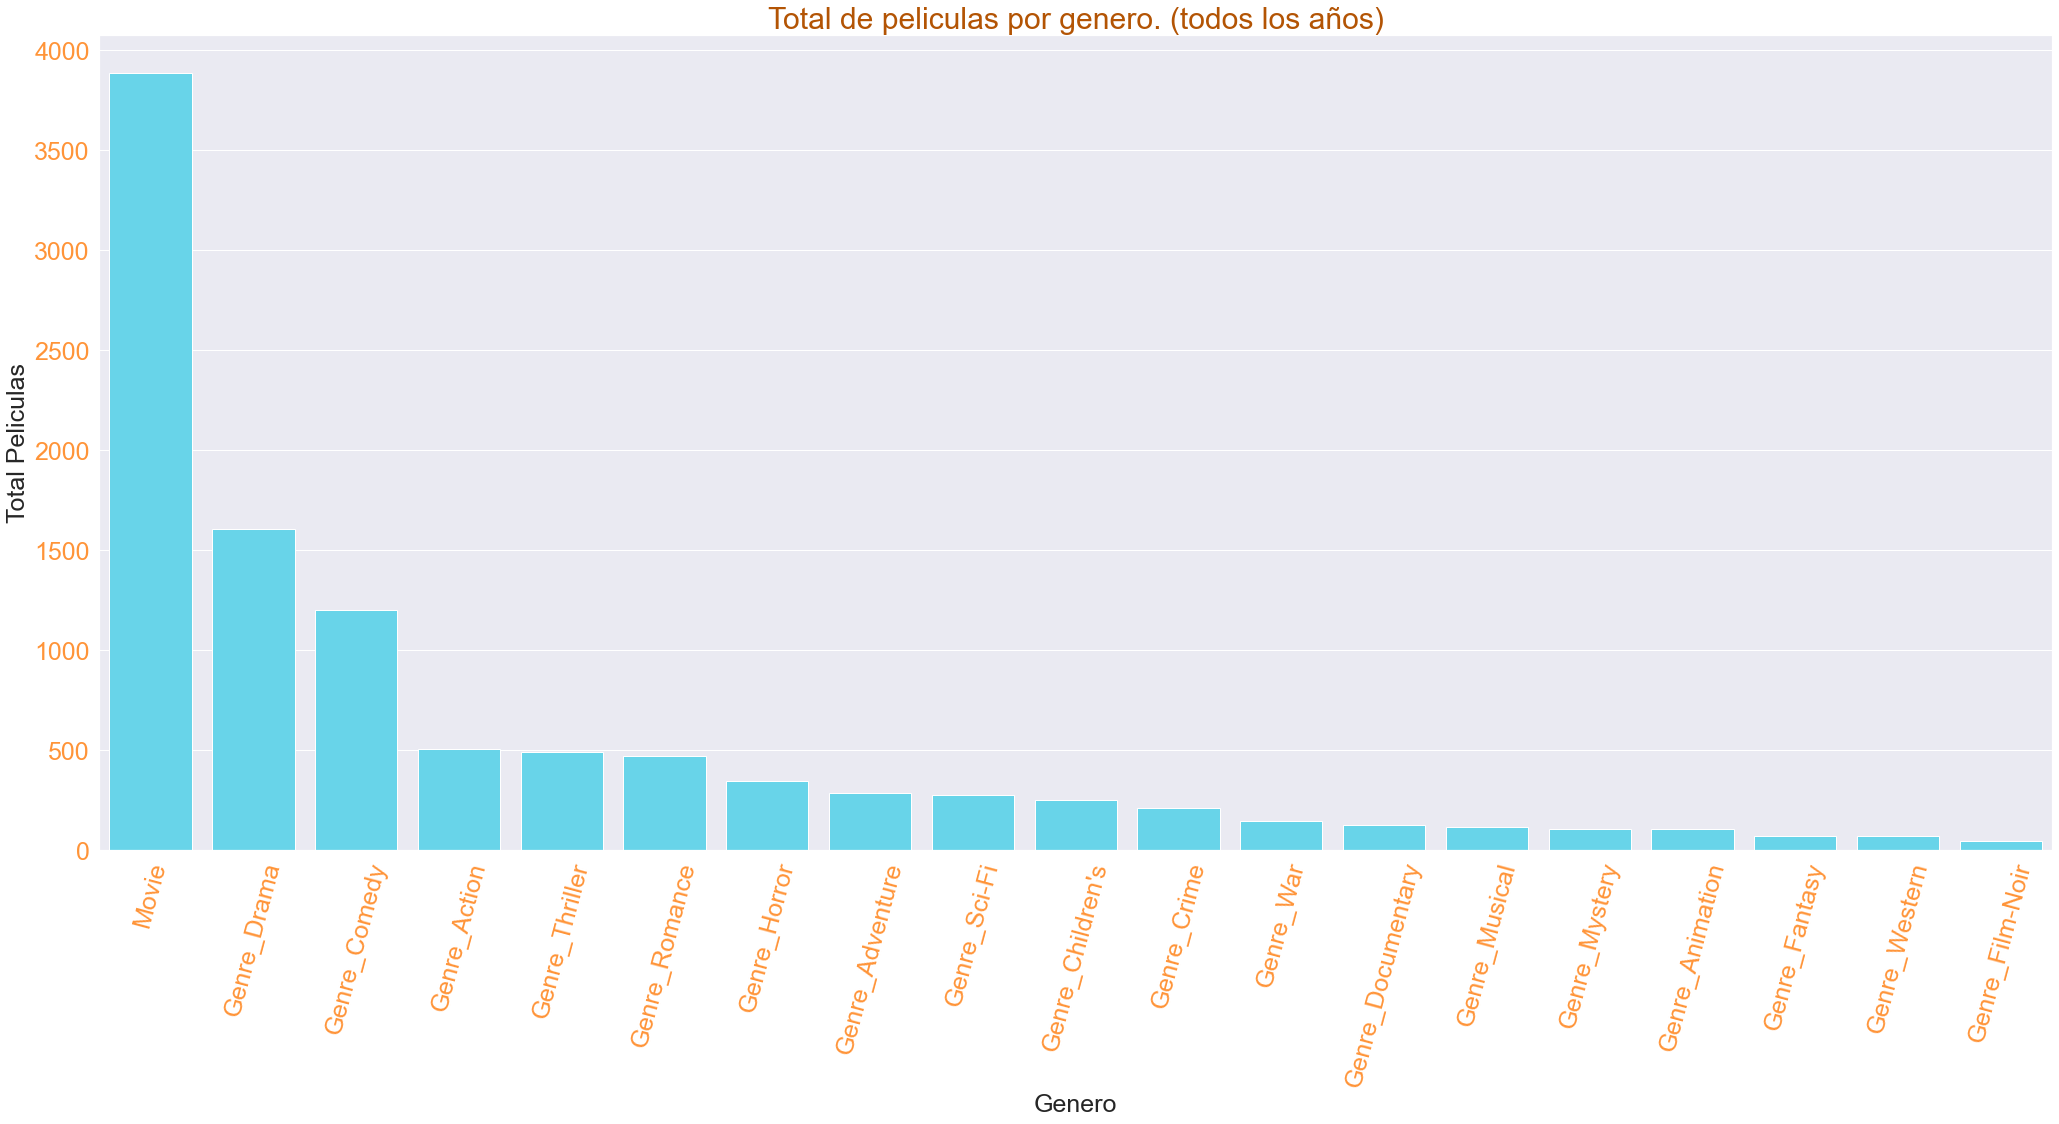

In [26]:
# Peliculas por genero totales

sns.set(rc = {'figure.figsize':(35,15)})

x=genres_sum.index
y=genres_sum.Total
sns.barplot(x=x, y=y, data=genres_sum,color='#52E2FF')
plt.title('Total de peliculas por genero. (todos los años)',fontsize=30,color='#B35404')
plt.ylabel('Total Peliculas',fontsize=25)
plt.xlabel('Genero',fontsize=25)
plt.xticks(fontsize=25,rotation=75,color='#FF9438')
plt.yticks(fontsize=25,color='#FF9438')
plt.show()

Hay un total de 19 generos.
Los generos que más se han producido son:

* Drama
* Comedy
* Action
* Thriller
* Romance

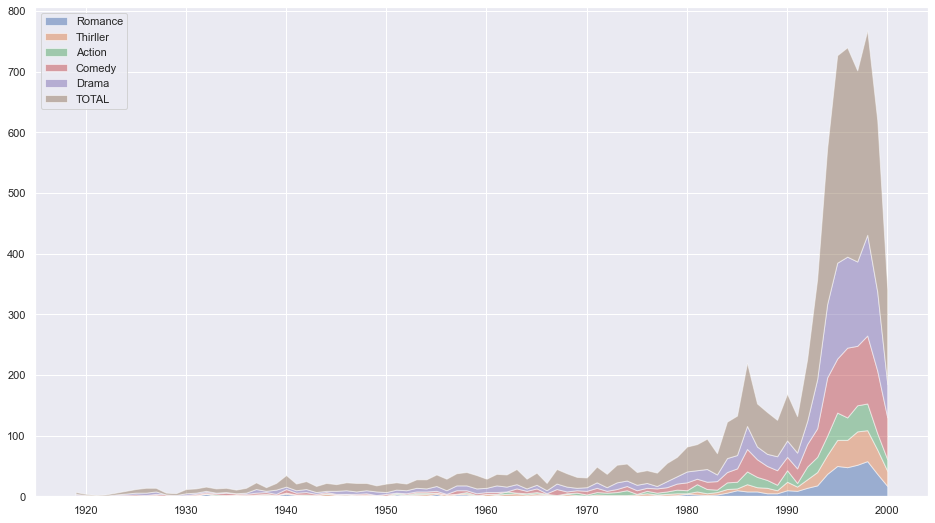

In [27]:
# Create data

plt.figure(figsize=(16,9))




x=movies_year.Year
y0=movies_year.Movie
y1=movies_year.Genre_Drama
y2=movies_year.Genre_Comedy
y3=movies_year.Genre_Action
y4=movies_year.Genre_Thriller
y5=movies_year.Genre_Romance
# Basic stacked area chart.
plt.stackplot(x,y5,y4, y3, y2,y1, y0, alpha=.5,labels=['Romance','Thirller','Action','Comedy','Drama','TOTAL'])
plt.legend(loc='upper left')

plt.show()

*EL año que más peliculas se lanzan es 1996

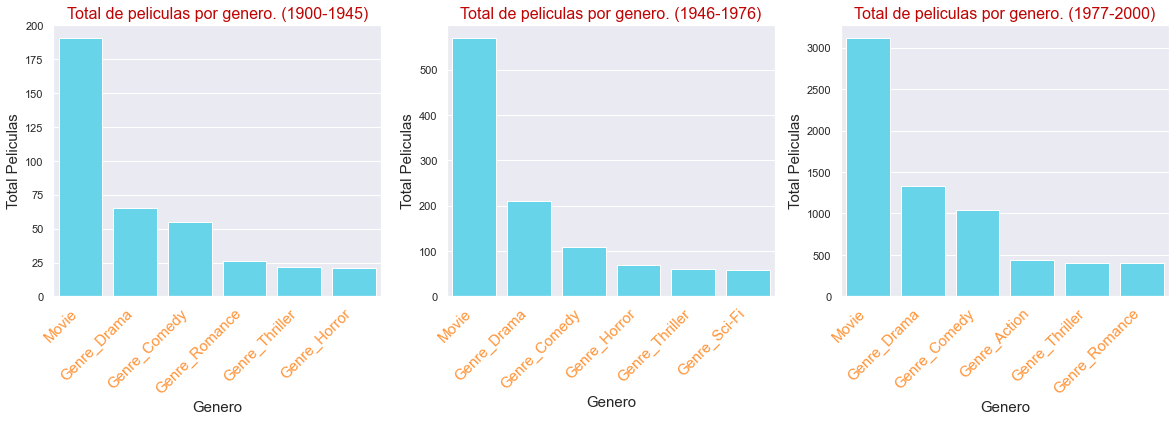

In [28]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=False) # sharex false.NO COMPARTEN EL EJE X

# HASTA LOS AÑOS 45

generos_45=genres_sum_45.iloc[:6]

x=generos_45.index
y=generos_45.Total

sns.barplot(x=x, y=y, data=generos_45,color='#52E2FF',ax=ax1)
ax1.set_title('Total de peliculas por genero. (1900-1945)',fontsize=16,color='#BF0404')
ax1.set_ylabel('Total Peliculas',fontsize=15)
ax1.set_xlabel('Genero',fontsize=15)

ax1.set_xticklabels(x,rotation=45,ha='right',fontsize=15,color='#FF9438')


# HASTA LOS AÑOS 76

generos_76=genres_sum_76.iloc[:6]

x=generos_76.index
y=generos_76.Total

sns.barplot(x=x, y=y, data=generos_76,color='#52E2FF',ax=ax2)
ax2.set_title('Total de peliculas por genero. (1946-1976)',fontsize=16,color='#BF0404')
ax2.set_ylabel('Total Peliculas',fontsize=15)
ax2.set_xlabel('Genero',fontsize=15)

ax2.set_xticklabels(x,rotation=45,ha='right',fontsize=15,color='#FF9438')

# HASTA LOS AÑOS 00

generos_00=genres_sum_00.iloc[:6]

x=generos_00.index
y=generos_00.Total

sns.barplot(x=x, y=y, data=generos_76,color='#52E2FF',ax=ax3)
ax3.set_title('Total de peliculas por genero. (1977-2000)',fontsize=16,color='#BF0404')
ax3.set_ylabel('Total Peliculas',fontsize=15)
ax3.set_xlabel('Genero',fontsize=15)

ax3.set_xticklabels(x,rotation=45,ha='right',fontsize=15,color='#FF9438')


plt.show()

Text(0.5, 1.0, 'Evolución 1976-2000. 8 Generos')

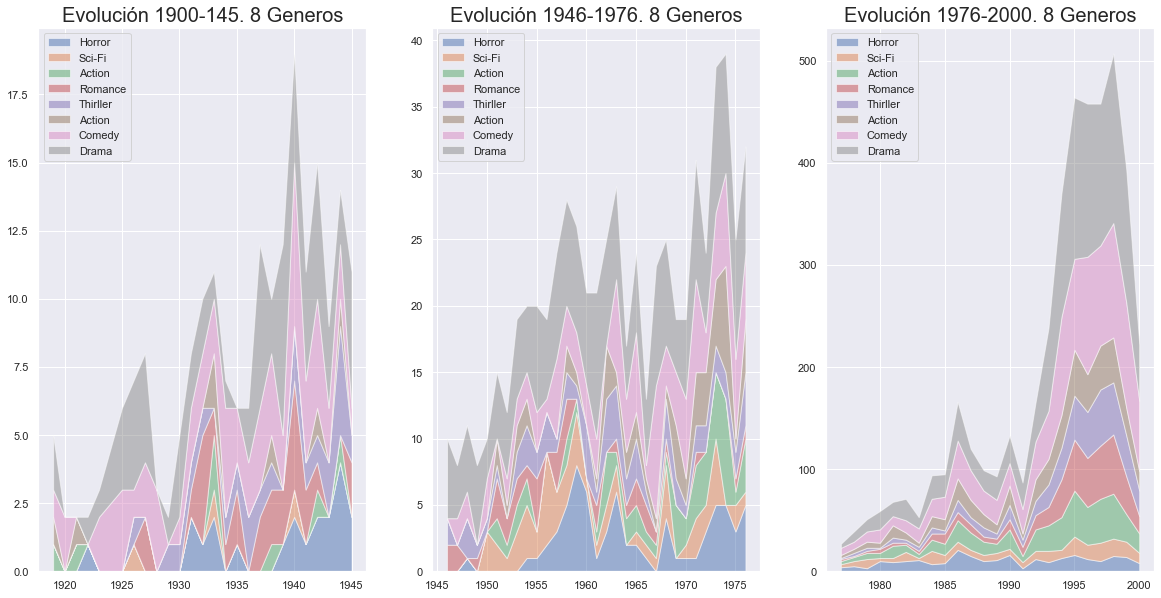

In [29]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,10), sharex=False) # sharex false.NO COMPARTEN EL EJE X

# hasta el 45

movies_year_45=movies_year[movies_year['Year']<=1945]

x=movies_year_45.Year

y1=movies_year_45.Genre_Drama
y2=movies_year_45.Genre_Comedy
y3=movies_year_45.Genre_Action
y4=movies_year_45.Genre_Thriller
y5=movies_year_45.Genre_Romance
y6=movies_year_45.Genre_Action
y7=movies_year_45['Genre_Sci-Fi']
y8=movies_year_45.Genre_Horror

# Basic stacked area chart.,
ax1.stackplot(x,y8,y7,y6,y5,y4, y3, y2,y1,  alpha=.5,labels=['Horror','Sci-Fi','Action','Romance','Thirller','Action','Comedy','Drama'])
ax1.legend(loc='upper left')
ax1.set_title('Evolución 1900-145. 8 Generos',fontsize='20')

# hasta el 76

movies_year_76=movies_year[(movies_year['Year']>1945)&(movies_year['Year']<=1976)]

x=movies_year_76.Year

y1=movies_year_76.Genre_Drama
y2=movies_year_76.Genre_Comedy
y3=movies_year_76.Genre_Action
y4=movies_year_76.Genre_Thriller
y5=movies_year_76.Genre_Romance
y6=movies_year_76.Genre_Action
y7=movies_year_76['Genre_Sci-Fi']
y8=movies_year_76.Genre_Horror

# Basic stacked area chart.,
ax2.stackplot(x,y8,y7,y6,y5,y4, y3, y2,y1,  alpha=.5,labels=['Horror','Sci-Fi','Action','Romance','Thirller','Action','Comedy','Drama'])
ax2.legend(loc='upper left')
ax2.set_title('Evolución 1946-1976. 8 Generos',fontsize='20')


#Hasta el 00
movies_year_00=movies_year[(movies_year['Year']>1976)&(movies_year['Year']<=2000)]

x=movies_year_00.Year

y1=movies_year_00.Genre_Drama
y2=movies_year_00.Genre_Comedy
y3=movies_year_00.Genre_Action
y4=movies_year_00.Genre_Thriller
y5=movies_year_00.Genre_Romance
y6=movies_year_00.Genre_Action
y7=movies_year_00['Genre_Sci-Fi']
y8=movies_year_00.Genre_Horror

# Basic stacked area chart.,
ax3.stackplot(x,y8,y7,y6,y5,y4, y3, y2,y1,  alpha=.5,labels=['Horror','Sci-Fi','Action','Romance','Thirller','Action','Comedy','Drama'])
ax3.legend(loc='upper left')
ax3.set_title('Evolución 1976-2000. 8 Generos',fontsize='20')

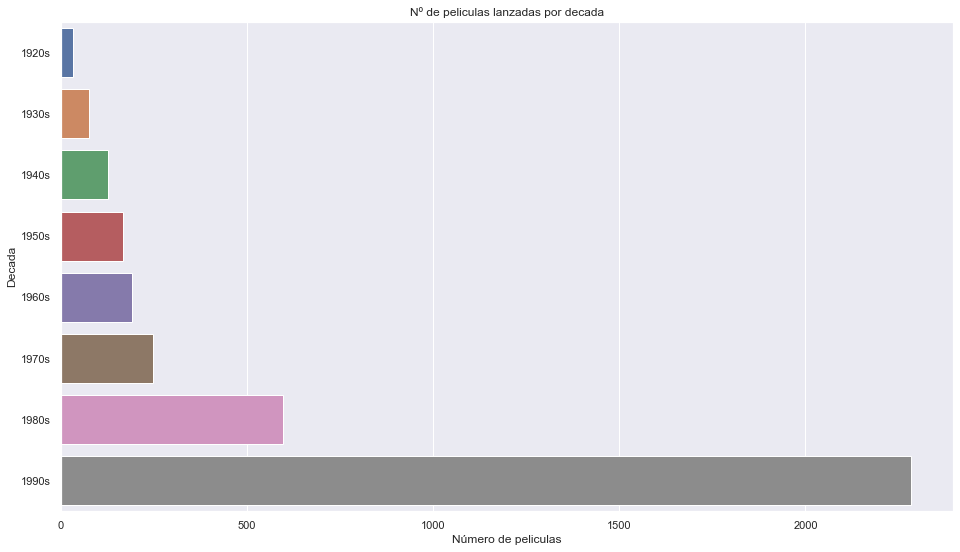

In [30]:
# Exercici:
# sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
# plt.show()

plt.figure(figsize=(16,9))

# ELminamos decadas 1910 y 2000E

decada=movies_decade.iloc[1:9]

sns.barplot(x='Movie', y='Decade', data=decada, orient="h")

plt.title('Nº de peliculas lanzadas por decada')
plt.xlabel('Número de peliculas')
plt.ylabel('Decada')
plt.show()

*En la decada de los 90 produjeron más del doble que todas las decadas anteriores.

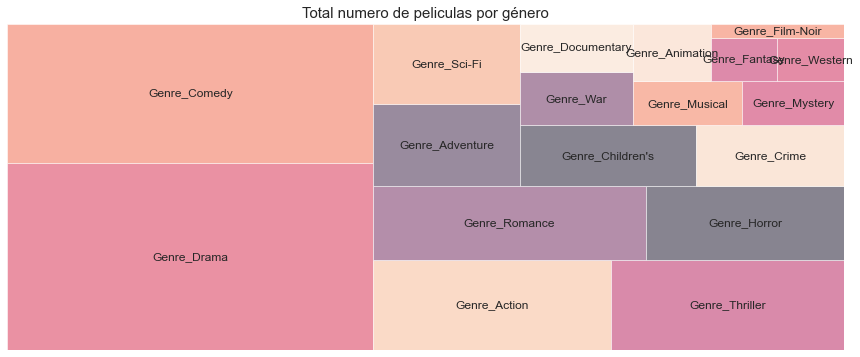

In [31]:
plt.figure(figsize =(15, 6))
genres_sum=genres_sum.reset_index()
sizes=genres_sum.iloc[1:]

squarify.plot(sizes=sizes.Total,label=sizes.Genero, alpha=.5,linewidth=1)
plt.axis('off')
plt.title('Total numero de peliculas por género', fontsize = 15)
plt.show()

In [32]:
movies_decade.set_index('Decade',inplace=True)
movies_decade.drop('Movie', axis=1, inplace=True)


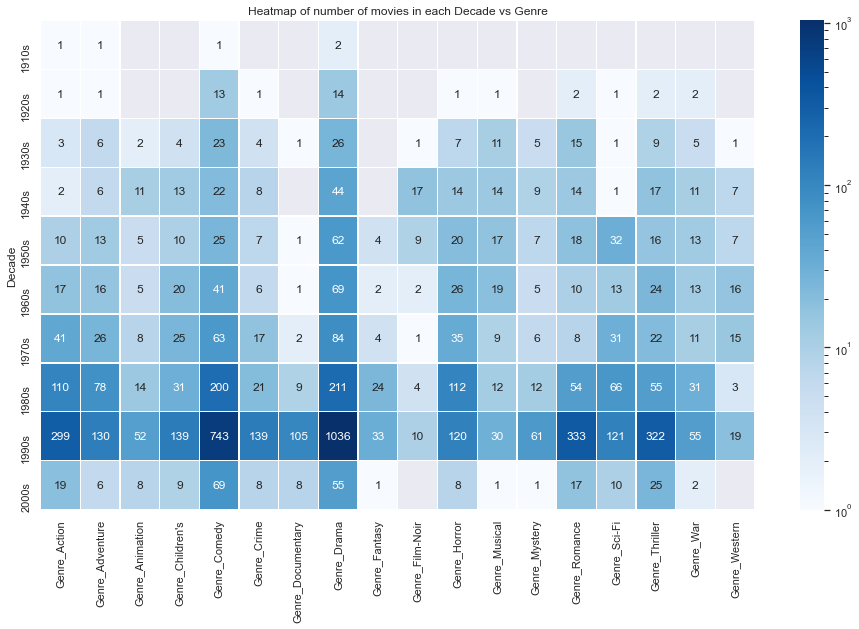

In [33]:
# Heatmap de genero versus fecada
from matplotlib.colors import LogNorm

plt.figure(figsize=(16,9))



sns.heatmap(movies_decade,
            annot=True, 
            annot_kws={"size": 12}, 
            fmt='d',  # ajusta el texto
           mask=(movies_decade==0),
             cmap="Blues", 
           linewidth=0.3, cbar_kws={"shrink": 1}
           ,norm=LogNorm())

plt.title('Heatmap of number of movies in each Decade vs Genre');

In [37]:
movies.reset_index()
movies.set_index('Movie')


,Genre,Year,Decade,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
Movie,,,,,,,,,,,,,,,,,,,,,
Toy Story,"[Animation, Children's, Comedy]",1995,1990s,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Jumanji,"[Adventure, Children's, Fantasy]",1995,1990s,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Grumpier Old Men,"[Comedy, Romance]",1995,1990s,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Waiting to Exhale,"[Comedy, Drama]",1995,1990s,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Father of the Bride Part II,[Comedy],1995,1990s,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meet the Parents,[Comedy],2000,2000s,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Requiem for a Dream,[Drama],2000,2000s,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tigerland,[Drama],2000,2000s,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


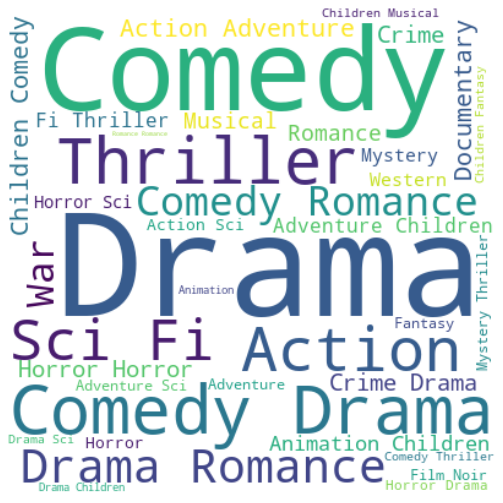

In [35]:

# Extraemos texto de la serie con listas.
text=""
for i in movies.Genre:

    text= " ".join(i)+" "+text
    
#creamos nube de palabras.
plt.figure(figsize=(16,9))

wordcloud = WordCloud(background_color="white",width=400, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


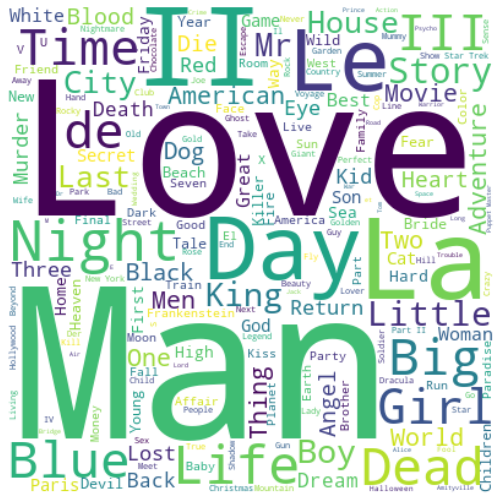

In [36]:
# nube de palabras con los titulos

# Extraemos texto de la serie con listas.
text=""
for i in movies.Movie:

    text= i+" "+text
    
#creamos nube de palabras.
plt.figure(figsize=(16,9))

wordcloud = WordCloud(background_color="white",width=400, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()